In [1]:
from tm_to_diagram import tm_to_diagram
from utils import rf
from simulateDfa import simulateDfa

## 9.9

### 問
図(テキストp200参照)のNFAをDFAに変換せよ.  

### 答
以下のDFA(`q9_9.dfa`)になる.

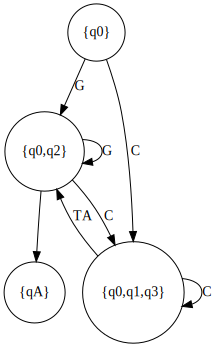

In [2]:
tm_to_diagram(rf('q9_9.dfa'))

## 9.10

### 問
$\Sigma = \{C, A, G, T\}$上の言語$L$は, 3個以上5個以下のGを含む文字列すべてからなる言語とする.  
$L$が正規言語であることを示せ.

### 答
$L$は以下のDFA(`q9_10.dfa`)によって判定されるので, 正規言語である.  
また, x=(C|A|T)\*G, y=(C|A|T)*とすると, $L$は"(xxxy)|(xxxxy)|(xxxxxy)"と正規表現される.

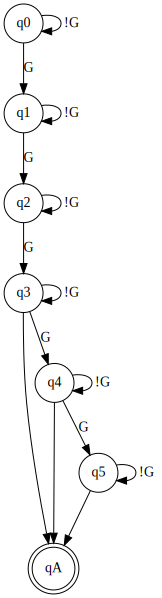

In [3]:
tm_to_diagram(rf('q9_10.dfa'))

In [4]:
# テスト
print(simulateDfa(rf('q9_10.dfa'), 'CCGATGAT'))  # 'G'2つ
print(simulateDfa(rf('q9_10.dfa'), 'AAGCAGGA'))  # 'G'3つ
print(simulateDfa(rf('q9_10.dfa'), 'GAGTGCCG'))  # 'G'4つ
print(simulateDfa(rf('q9_10.dfa'), 'GAGCGTGG'))  # 'G'5つ
print(simulateDfa(rf('q9_10.dfa'), 'GGGAGGAG'))  # 'G'6つ

no
yes
yes
yes
no


## 9.11

### 問
$\Sigma=\{C, A, G, T\}$上の言語$L$は, 部分文字列"TCA"が複数回(0個もOK)現れ, それらが0個以上の"G"で区切られているような文字列全てからなる言語とする.  
$L$を表す正規表現を見つけよ.  
例: $\epsilon$, "TCATCA", "GGGTCAGGTCAGGGG", "TCAGGGYCAGGTCATCAGGGG"

### 答
((TCA)\*G\*)\*

## 9.12

### 問
正規表現(T(GGA)\*\|C)\*と等価なNFAを見つけよ.  

### 答
以下のNFA(`q9_12.nfa`)と等価.

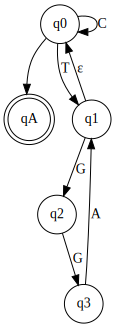

In [5]:
tm_to_diagram(rf('q9_12.nfa'))

In [6]:
# テスト
from simulateNfa import simulateNfa
print(simulateNfa(rf('q9_12.nfa'), 'TCCTGGATGGAGGACC'))
print(simulateNfa(rf('q9_12.nfa'), 'TCCTGAC'))
print(simulateNfa(rf('q9_12.nfa'), 'CCTCGGATCC'))
print(simulateNfa(rf('q9_12.nfa'), ''))

yes
no
no
yes


## 9.13

### 問
次のDFA(q9_13.nfa)を等価な正規表現に変換せよ.  

### 答
(A(TG)\*CG)\*A(TG)\*C|T

#### 考え方
1. q3を取り除き, `q1->q1: TG` と`q1->qA: T_`を追加する. (q9_13_1.nfa)
2. q2を取り除き, `q1->q0: CG` を追加し, `q1->qA: C|T_`に書き換えを行う. (q9_13_2.nfa)
3. q1を取り除き, `q0->q0: A(TG)*CG`, `q0->qA: A(TG)*C|T`を追加する. (q9_13_3.nfa)




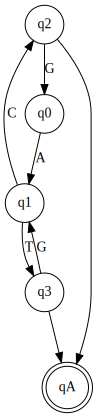

In [5]:
tm_to_diagram(rf('q9_13.nfa'))

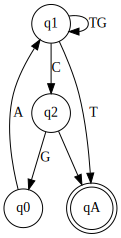

In [6]:
tm_to_diagram(rf('q9_13_1.nfa'))

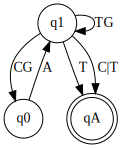

In [7]:
tm_to_diagram(rf('q9_13_2.nfa'))

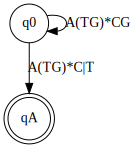

In [8]:
tm_to_diagram(rf('q9_13_3.nfa'))

### 9.14
### 問 
[Pythonの標準正規表現ライブラリのドキュメント](https://docs.python.org/ja/3/library/re.html)を読め.

このライブラリを使って1個以上の役に立つPythonプログラムを作れ.


In [2]:
import re
import q9_14

q9_14.pyにq9_14とisValidPasswordという2種類の関数を用意した.
- q9_14
    - 第一引数: 文字列, 第二引数: {1,  2, 3, 4, 5}
    - 第二引数に従って第一引数が以下の条件を満たすか判定し, "Yes" または "No"を返す
        1. 英数字かどうか 
        2. 遺伝子文字列かどうか 
        3. 部分文字列GAGAとCTTCCをこの順番で含むかどうか 
        4. 正規表現(AA(CG)?(T?))?|GGTにマッチするかどうか 
        5. Python関数定義を含んでいるか
- isValidPassword
    - 文字列を引数にとり, 以下の条件を満たす場合は"Valid", 満たさない場合は"Invalid"を返す.
    - 大文字小文字数字記号を4種類用いて8文字以上100文字以内かどうか

In [3]:
print(q9_14.q9_14("12ab", 1))
print(q9_14.q9_14("1@ab", 1))
print(q9_14.q9_14("GAGCTGA", 2))
print(q9_14.q9_14("CHACHACHA", 2))
print(q9_14.q9_14("BBBAGAGABBBCTTCC", 3))
print(q9_14.q9_14("BBBAGADGABBBCTTCC", 3))
print(q9_14.q9_14("AAT", 4))
print(q9_14.q9_14("GGT", 4))
print(q9_14.q9_14("GGAAS", 4))
print(q9_14.q9_14(rf('q9_14.py'), 5))
print(q9_14.q9_14(rf('q9_13_1.nfa'), 5))
print(q9_14.isValidPassword("password"))
print(q9_14.isValidPassword("P@ssw0rd"))

Yes
No
Yes
No
Yes
No
Yes
Yes
No
Yes
No
InVaild
Valid


### 9.15
### 問 
$\{C^nTTC^m|m>n+5\}$という言語が正規言語でないことを反復補題を使って証明せよ

### 答 
$L = \{C^nTTC^m|m>n+5\}$が正規言語であると仮定する.$L$は無限言語なので反復補題により, $|S|\ge N$を満たすすべての$S\in L$について$N$までの位置でポンピングできるような$N$という限界点が存在する.ここで$S = C^NTTC^{N+6}$という特定の文字列を考えると, $S$は$L$の要素なので先頭$N$文字の中に$S$をポンピングできる$R$という空でない文字列が含まれている.$R$は少なくとも1個以上の$C$から構成されているので,$R = C^k$(ただし$k \ge 1$)である. $S$をポンピングして$R$のコピーを追加いした新しい文字列$S^\prime = C^{N+k}TTC^{N+6}$は$L$に含まれないため, 矛盾が生じる.

### 9.16
### 問 
ASCII文字列のうち, EU加盟国よりもアメリカの州名を多く含んでいるような文字列すべてからなる言語が正規言語でないことを反復補題を使って証明せよ

### 答 
EU加盟国よりもアメリカの州名を多く含んでいるような文字列すべてからなる言語$L_1$が正規言語であると仮定する. いま, $\{({すべてのEU加盟国の選択})*({すべてのアメリカの州名の選択})*\}$のように純粋正規表現であらわすことのできる言語$L_2$との積集合$L$を考える. $L_1$, $L_2$はどちらも正規言語であるので$L$も正規言語である. $L$は無限言語なので反復補題により, $|S|\ge N$を満たすすべての$S\in L$について$N$までの位置でポンピングできるような$N$という限界点が存在する.ここで$S = (Spain)^{\lceil N/5 \rceil}(Arizona)^{\lceil N/5 \rceil +1}$という特定の文字列を考えると, $S$は$L$の要素なので先頭$N$文字の中に$S$をポンピングできる$R$という空でない文字列が含まれている. $L_2$の定義からはみ出さないために, $R$は少なくとも1個以上の$Spain$から構成されているので,$R = (Spain)^k$(ただし$k \ge 1$)である. $S$をポンピングして$R$のコピーを追加いした新しい文字列$S^\prime =(Spain)^{\lceil N/5 \rceil +k}(Arizona)^{\lceil N/5 \rceil+1}$は$L_1$に含まれないため$L$に含まれず, 矛盾が生じる.